- Create Fedyk Portfolio to check specification

In [155]:
import numpy as np

from src import Analyzer
from src.utils.params import ReturnParams

return_params = ReturnParams(
    start_date=None,
    cumulative=True,
    append_start=False
)

an_fedyk_s = Analyzer(compare_tickers=[], return_params=return_params, stocks_only=True, weights_application="wealth", dl_kwargs={"weights_method":"share"})
an_fedyk_d = Analyzer(compare_tickers=[], return_params=return_params, stocks_only=True, weights_application="wealth", dl_kwargs={"weights_method":"dollar"})
an_mine = Analyzer(compare_tickers=[], return_params=return_params, stocks_only=True, weights_application="number", dl_kwargs={"weights_method":"dollar"})

r_fedyk_s, h_fedyk_s = an_fedyk_s.build_returns()
r_fedyk_s = np.exp(r_fedyk_s)-1
r_fedyk_d, h_fedyk_d = an_fedyk_d.build_returns()
r_fedyk_d = np.exp(r_fedyk_d)-1
r_mine, h_mine = an_mine.build_returns()
r_mine = np.exp(r_mine)-1


2025-04-23 00:09:01,574 - src.analyzer - INFO - ############################## Analysis Started ############################## (analyzer.py:79)
2025-04-23 00:09:08,145 - src.analyzer - INFO - ############################## Analysis Started ############################## (analyzer.py:79)
2025-04-23 00:09:10,916 - src.analyzer - INFO - ############################## Analysis Started ############################## (analyzer.py:79)
2025-04-23 00:09:12,875 - src.analyzer - WARNING - Empty dataframe produced for tickers: [] (analyzer.py:168)
2025-04-23 00:09:13,027 - src.analyzer - WARNING - Empty dataframe produced for tickers: [] (analyzer.py:168)
2025-04-23 00:09:13,158 - src.analyzer - WARNING - Empty dataframe produced for tickers: [] (analyzer.py:168)


- read factor file

In [56]:
import pandas as pd
from config.constants import PROJECT_ROOT

file_dir = f"{PROJECT_ROOT}\\data\\models\\f-f_research_data_5_factors_2x3_daily.csv"
df_factor = pd.read_csv(file_dir, skiprows=3, index_col=0)
df_factor.index

Index([19630701, 19630702, 19630703, 19630705, 19630708, 19630709, 19630710,
       19630711, 19630712, 19630715,
       ...
       20241217, 20241218, 20241219, 20241220, 20241223, 20241224, 20241226,
       20241227, 20241230, 20241231],
      dtype='int64', length=15481)

In [ ]:
file_dir = f"{PROJECT_ROOT}\\data\\models\\f-f_momentum_factor_daily.csv"
df_mom = pd.read_csv(file_dir, skiprows=12, index_col=0).iloc[:-1] #last row contains copyright
df_mom.index = df_mom.index.astype(int)
df_factor = df_factor.merge(df_mom, left_index=True, right_index=True)
df_factor

,Mkt-RF,SMB,HML,RMW,CMA,RF,Mom
19630701,-0.67,0.02,-0.35,0.03,0.13,0.012,-0.21
19630702,0.79,-0.28,0.28,-0.08,-0.21,0.012,0.42
19630703,0.63,-0.18,-0.10,0.13,-0.25,0.012,0.41
19630705,0.40,0.09,-0.28,0.07,-0.30,0.012,0.07
19630708,-0.63,0.07,-0.20,-0.27,0.06,0.012,-0.45
...,...,...,...,...,...,...,...
20241224,1.11,-0.12,-0.05,-0.13,-0.37,0.017,0.67
20241226,0.02,1.09,-0.19,-0.44,0.35,0.017,0.01
20241227,-1.17,-0.44,0.56,0.41,0.03,0.017,-0.88
20241230,-1.09,0.24,0.74,0.55,0.14,0.017,0.06


In [68]:
beginning_date = str(min(r_fedyk_d.index))
end_date = str(max(r_fedyk_d.index))

def date_to_num(date):
    date = str(date)
    if " 00:00:00" in date:
        date = date.replace(" 00:00:00", "")
    date = date.replace("-", "")
    return int(date)

beginning_date = date_to_num(beginning_date)
end_date = date_to_num(end_date)


In [61]:
df_factor[df_factor.index>=beginning_date]

,Mkt-RF,SMB,HML,RMW,CMA,RF,Mom
20180502,-0.63,1.25,-0.36,0.04,0.02,0.006,0.40
20180503,-0.25,-0.61,-0.15,0.05,-0.12,0.006,0.89
20180504,1.30,-0.02,-0.20,-0.43,0.00,0.006,-0.40
20180507,0.42,0.37,-0.34,-0.52,-0.22,0.006,0.38
20180508,0.07,0.51,0.24,-0.25,0.08,0.006,0.48
...,...,...,...,...,...,...,...
20241224,1.11,-0.12,-0.05,-0.13,-0.37,0.017,0.67
20241226,0.02,1.09,-0.19,-0.44,0.35,0.017,0.01
20241227,-1.17,-0.44,0.56,0.41,0.03,0.017,-0.88
20241230,-1.09,0.24,0.74,0.55,0.14,0.017,0.06


In [67]:
r_fedyk_d.index

DatetimeIndex(['2018-05-02', '2018-05-03', '2018-05-04', '2018-05-07',
               '2018-05-08', '2018-05-09', '2018-05-10', '2018-05-11',
               '2018-05-14', '2018-05-15',
               ...
               '2020-07-31', '2020-08-03', '2020-08-04', '2020-08-05',
               '2020-08-06', '2020-08-07', '2020-08-10', '2020-08-11',
               '2020-08-12', '2020-08-13'],
              dtype='datetime64[ns]', name='date', length=564, freq=None)

In [ ]:
index = []
for i in range(len(r_fedyk_d.index)):
    index.append(date_to_num(r_fedyk_d.index[i]))

r_fedyk_d.index = index

r_fedyk_d


,rh_portfolio,rh_portfolio_1_return,rh_portfolio_564_return
20180502,0.000000,0.000000,0.000000
20180503,-0.007904,-0.007904,-0.007904
20180504,0.018903,0.018903,0.010849
20180507,0.008840,0.008840,0.019786
20180508,0.005466,0.005466,0.025360
...,...,...,...
20200807,-0.003282,-0.003282,0.731386
20200810,0.018228,0.018228,0.762946
20200811,-0.021758,-0.021758,0.724588
20200812,0.009674,0.009674,0.741271


In [104]:

model_df = df_factor.merge(r_fedyk_d["rh_portfolio"], left_index=True, right_index=True)[1:] # first day is zero
model_df.columns = [''.join(col.split()).lower() for col in model_df.columns]
model_df["rh_portfolio"] = model_df["rh_portfolio"]*100 # transform in pct
model_df

,mkt-rf,smb,hml,rmw,cma,rf,mom,rh_portfolio
20180503,-0.25,-0.61,-0.15,0.05,-0.12,0.006,0.89,-0.790437
20180504,1.30,-0.02,-0.20,-0.43,0.00,0.006,-0.40,1.890329
20180507,0.42,0.37,-0.34,-0.52,-0.22,0.006,0.38,0.884042
20180508,0.07,0.51,0.24,-0.25,0.08,0.006,0.48,0.546604
20180509,0.89,-0.28,0.26,-0.89,0.14,0.006,0.22,1.161784
...,...,...,...,...,...,...,...,...
20200807,0.02,1.59,2.41,0.52,0.15,0.000,-2.08,-0.328237
20200810,0.24,1.32,1.75,0.85,1.25,0.000,-2.79,1.822784
20200811,-0.83,0.18,1.63,0.91,0.03,0.000,-2.19,-2.175789
20200812,1.40,-0.82,-1.37,0.91,-0.12,0.000,1.86,0.967390


In [ ]:
welch_regression = pd.read_csv(f"{PROJECT_ROOT}/jf-datashare/gabriel-cuevas/data/18_rwarh_d_1.csv", index_col=0)
welch_regression

,pfioret100,xmkt,smb,hml,rmw,cma,rf,umd
yyyymmdd,,,,,,,,
20180604,0.801442,0.48,0.15,-0.46,1.06,-0.30,0.006,0.17
20180605,0.838875,0.16,0.79,-0.43,0.23,0.11,0.006,0.29
20180606,0.909019,0.86,-0.28,0.19,-0.02,0.15,0.006,-0.01
20180607,-0.440410,-0.14,-0.24,0.91,0.17,0.59,0.006,-0.91
20180608,0.341546,0.31,0.05,-0.41,0.27,-0.19,0.006,-0.13
...,...,...,...,...,...,...,...,...
20200810,1.828497,0.24,1.27,1.66,0.86,1.24,0.000,-2.82
20200811,-2.154837,-0.83,0.18,1.57,0.89,0.07,0.000,-2.21
20200812,0.948135,1.40,-0.81,-1.30,0.95,-0.14,0.000,1.87


In [108]:

welch_regression = welch_regression.merge(r_fedyk_d["rh_portfolio"], left_index=True, right_index=True)[1:] # first day is zero
welch_regression.columns = [''.join(col.split()).lower() for col in welch_regression.columns]
welch_regression["rh_portfolio"] = welch_regression["rh_portfolio"]*100 # transform in pct
welch_regression

,pfioret100,xmkt,smb,hml,rmw,cma,rf,umd,rh_portfolio
20180605,0.838875,0.16,0.79,-0.43,0.23,0.11,0.006,0.29,0.849502
20180606,0.909019,0.86,-0.28,0.19,-0.02,0.15,0.006,-0.01,0.926717
20180607,-0.440410,-0.14,-0.24,0.91,0.17,0.59,0.006,-0.91,-0.435322
20180608,0.341546,0.31,0.05,-0.41,0.27,-0.19,0.006,-0.13,0.339441
20180611,0.908464,0.12,0.15,-0.17,0.22,0.23,0.006,-0.64,0.919058
...,...,...,...,...,...,...,...,...,...
20200807,-0.300979,0.02,1.52,2.34,0.49,0.17,0.000,-2.01,-0.328237
20200810,1.828497,0.24,1.27,1.66,0.86,1.24,0.000,-2.82,1.822784
20200811,-2.154837,-0.83,0.18,1.57,0.89,0.07,0.000,-2.21,-2.175789
20200812,0.948135,1.40,-0.81,-1.30,0.95,-0.14,0.000,1.87,0.967390


In [111]:
import statsmodels.api as sm

welch_regression["xr"] = welch_regression['rh_portfolio'] - welch_regression['rf']

X = welch_regression[['xmkt', 'smb', 'hml', 'rmw', 'cma', 'umd']]
y = welch_regression["xr"]

X = sm.add_constant(X)  # this adds the alpha term

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                     xr   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     1021.
Date:                Tue, 22 Apr 2025   Prob (F-statistic):          9.05e-288
Time:                        23:55:05   Log-Likelihood:                -458.20
No. Observations:                 538   AIC:                             930.4
Df Residuals:                     531   BIC:                             960.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0641      0.025      2.583      0.0

# THE CONST IS WRONG BECAUSE IT IS EXPRESSED IN %

<Axes: >

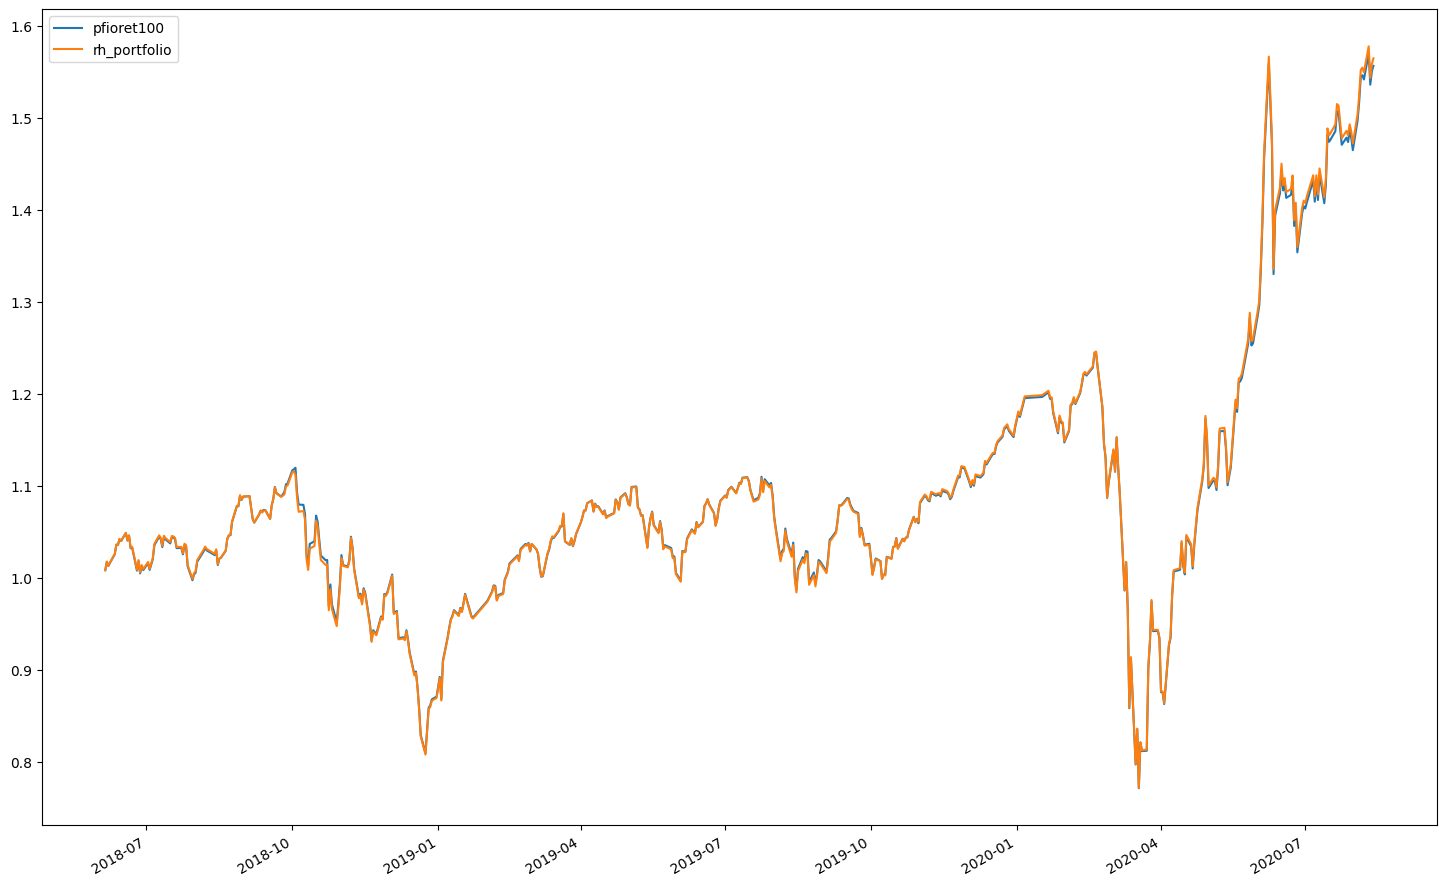

In [144]:
df_plot = (welch_regression[["pfioret100", "rh_portfolio"]]/100+1)
df_plot.index = pd.to_datetime(df_plot.index, format="%Y%m%d")
df_plot.cumprod().plot(figsize=(18,12))

- welch regression

In [97]:
welch_regression = pd.read_csv(f"{PROJECT_ROOT}/jf-datashare/gabriel-cuevas/data/18_rwarh_d_1.csv", index_col=0)
welch_regression

,pfioret100,xmkt,smb,hml,rmw,cma,rf,umd
yyyymmdd,,,,,,,,
20180604,0.801442,0.48,0.15,-0.46,1.06,-0.30,0.006,0.17
20180605,0.838875,0.16,0.79,-0.43,0.23,0.11,0.006,0.29
20180606,0.909019,0.86,-0.28,0.19,-0.02,0.15,0.006,-0.01
20180607,-0.440410,-0.14,-0.24,0.91,0.17,0.59,0.006,-0.91
20180608,0.341546,0.31,0.05,-0.41,0.27,-0.19,0.006,-0.13
...,...,...,...,...,...,...,...,...
20200810,1.828497,0.24,1.27,1.66,0.86,1.24,0.000,-2.82
20200811,-2.154837,-0.83,0.18,1.57,0.89,0.07,0.000,-2.21
20200812,0.948135,1.40,-0.81,-1.30,0.95,-0.14,0.000,1.87


In [ ]:
import statsmodels.api as sm

welch_regression["xr"] = welch_regression['pfioret100'] - welch_regression['rf']

X = welch_regression[['xmkt', 'smb', 'hml', 'rmw', 'cma', 'umd']]
y = welch_regression["xr"]

X = sm.add_constant(X)  # this adds the alpha term

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                     xr   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     1036.
Date:                Tue, 22 Apr 2025   Prob (F-statistic):          4.35e-291
Time:                        23:46:42   Log-Likelihood:                -457.90
No. Observations:                 543   AIC:                             929.8
Df Residuals:                     536   BIC:                             959.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0637      0.025      2.598      0.0

- my regression

In [156]:
index = []
for i in range(len(r_mine.index)):
    index.append(date_to_num(r_mine.index[i]))

r_mine.index = index

r_mine

welch_regression = pd.read_csv(f"{PROJECT_ROOT}/jf-datashare/gabriel-cuevas/data/18_rwarh_d_1.csv", index_col=0)
welch_regression


welch_regression = welch_regression.merge(r_mine["rh_portfolio"], left_index=True, right_index=True)[1:] # first day is zero
welch_regression.columns = [''.join(col.split()).lower() for col in welch_regression.columns]
welch_regression["rh_portfolio"] = welch_regression["rh_portfolio"]*100 # transform in pct
welch_regression

,pfioret100,xmkt,smb,hml,rmw,cma,rf,umd,rh_portfolio
20180605,0.838875,0.16,0.79,-0.43,0.23,0.11,0.006,0.29,0.433407
20180606,0.909019,0.86,-0.28,0.19,-0.02,0.15,0.006,-0.01,0.922186
20180607,-0.440410,-0.14,-0.24,0.91,0.17,0.59,0.006,-0.91,-0.870488
20180608,0.341546,0.31,0.05,-0.41,0.27,-0.19,0.006,-0.13,0.172827
20180611,0.908464,0.12,0.15,-0.17,0.22,0.23,0.006,-0.64,0.528392
...,...,...,...,...,...,...,...,...,...
20200807,-0.300979,0.02,1.52,2.34,0.49,0.17,0.000,-2.01,-1.539626
20200810,1.828497,0.24,1.27,1.66,0.86,1.24,0.000,-2.82,-0.230960
20200811,-2.154837,-0.83,0.18,1.57,0.89,0.07,0.000,-2.21,-1.668783
20200812,0.948135,1.40,-0.81,-1.30,0.95,-0.14,0.000,1.87,4.655664


In [157]:
import statsmodels.api as sm

welch_regression["xr"] = welch_regression['rh_portfolio'] - welch_regression['rf']

X = welch_regression[['xmkt', 'smb', 'hml', 'rmw', 'cma', 'umd']]
y = welch_regression["xr"]

X = sm.add_constant(X)  # this adds the alpha term

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     xr   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     557.0
Date:                Wed, 23 Apr 2025   Prob (F-statistic):          2.08e-225
Time:                        00:09:26   Log-Likelihood:                -584.44
No. Observations:                 538   AIC:                             1183.
Df Residuals:                     531   BIC:                             1213.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0064      0.031     -0.205      0.8

<Axes: >

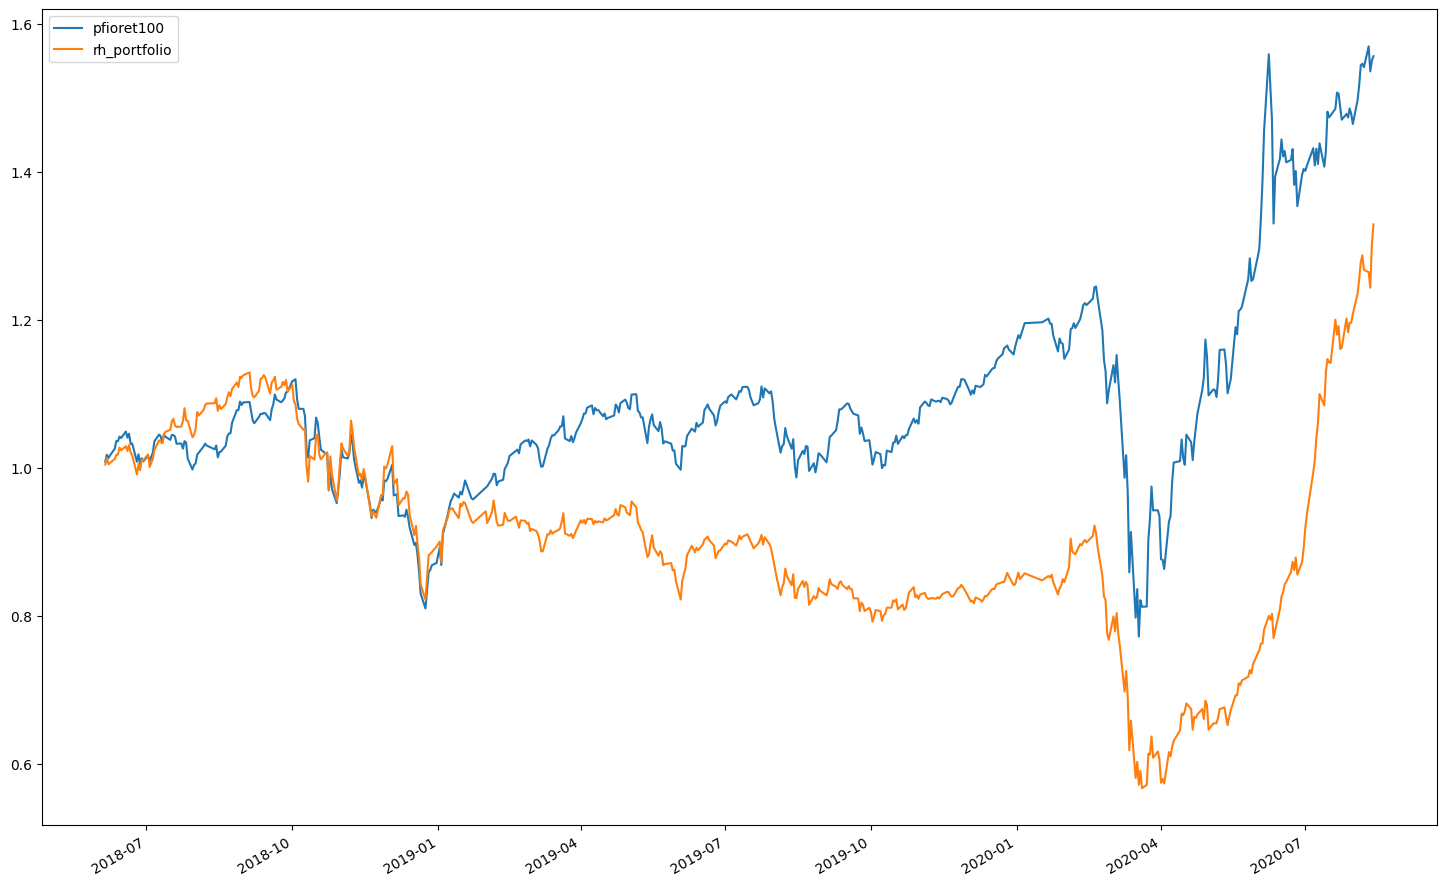

In [158]:
df_plot = (welch_regression[["pfioret100", "rh_portfolio"]]/100+1)
df_plot.index = pd.to_datetime(df_plot.index, format="%Y%m%d")
df_plot.cumprod().plot(figsize=(18,12))